In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [19]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [20]:
## testing installation
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# (1) Understanding Dataset:

### Loading the required packages

In [61]:
# import findspark
# findspark.init()
# import pyspark
# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SparkSession
# conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
# sc = pyspark.SparkContext(conf=conf)
# spark = SparkSession(sc)

"import findspark\nfindspark.init()\nimport pyspark\nfrom pyspark import SparkContext, SparkConf\nfrom pyspark.sql import SparkSession\nconf = pyspark.SparkConf().setAppName('appName').setMaster('local')\nsc = pyspark.SparkContext(conf=conf)\nspark = SparkSession(sc)"

### Loading the dataset

In [31]:
df = spark.read.format("csv").option('header','true').option("inferSchema", "true").load("03-01-2018.csv")
df2 = spark.read.format("csv").option('header','true').option("inferSchema", "true").load("03-02-2018.csv")

In [32]:
print(df.count())
print(df2.count())

331112
61534


In [33]:
#Drop null values in the dataset
df=df.na.drop()
df2 = df2.na.drop()

In [34]:
print(df.count())
print(df2.count())

329266
61485


In [48]:
# first 5 entries
df.show(5)

+--------+--------+----------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------

# (2) Big Data Query & Analysis using Spark SQL

In [49]:
# Student 1: Venkatesh BANDARUPALLI  ID:u2007302

''' Query1: Counting the distinct classes in the Protocal column'''
from pyspark.sql.functions import col, countDistinct
df.select(countDistinct("Protocol")).show()

+------------------------+
|count(DISTINCT Protocol)|
+------------------------+
|                       3|
+------------------------+



In [50]:
# Student 1: Venkatesh BANDARUPALLI  ID:u2007302

''' Query2: Counting the Total appearaance of every class in the Label column'''
df.select('Label').groupBy("Label").count().show()

+-------------+------+
|        Label| count|
+-------------+------+
|Infilteration| 92634|
|       Benign|236632|
+-------------+------+



In [51]:
# Student 2: Sairam CHINTHA          ID:u2007875

''' Query1: Selecting the count of every Protocol '''
df.select('Protocol').groupBy("Protocol").count().show()

+--------+------+
|Protocol| count|
+--------+------+
|       6|211065|
|      17|111052|
|       0|  7149|
+--------+------+



In [52]:
# Student 2: Sairam CHINTHA          ID:u2007875

''' Query2: Selecting the count of every Protocol with Label Benign'''
df.filter(df["Label"]=="Benign").groupBy("Protocol").count().show()

+--------+------+
|Protocol| count|
+--------+------+
|       6|146091|
|      17| 84602|
|       0|  5939|
+--------+------+



In [53]:
# Student 3: Sreemu KOMATI  ID:u2008089

''' Query1: Selecting the count of every Protocol with Label Infilteration'''
df.filter(df["Label"]=="Infilteration").groupBy("Protocol").count().show()

+--------+-----+
|Protocol|count|
+--------+-----+
|       6|64974|
|      17|26450|
|       0| 1210|
+--------+-----+



In [54]:
# Student 3: Sreemu KOMATI  ID:u2008089

''' Query2: Filtering and count of every Label within 'Protocol 17'''
df.filter(df["Protocol"]==17).groupBy("Label").count().show()

+-------------+-----+
|        Label|count|
+-------------+-----+
|Infilteration|26450|
|       Benign|84602|
+-------------+-----+



In [55]:
# Student 4: Lakshmi Rahul MUVVA     ID:u2042883

''' Query1: Filtering and count of every Label within 'Protocol 6'''
df.filter(df["Protocol"]==6).groupBy("Label").count().show()

+-------------+------+
|        Label| count|
+-------------+------+
|Infilteration| 64974|
|       Benign|146091|
+-------------+------+



In [56]:
# Student 4: Lakshmi Rahul MUVVA     ID:u2042883
''' Query2: Sorting the data with 'Flow IAT Mean' and see=lecting first 2 rows'''
df.sort('Flow IAT Mean', ascending=False).show(2)

+--------+--------+----------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------

In [57]:
# Student 5: Suhasini ALATI          ID:u1962019

''' Query1: Selecting 'Protocol','Timestamp','Label' only'''
df.select('Protocol','Timestamp','Label').show(10)

+--------+----------------+------+
|Protocol|       Timestamp| Label|
+--------+----------------+------+
|       0|01/03/2018 08:17|Benign|
|       0|01/03/2018 08:20|Benign|
|      17|01/03/2018 08:17|Benign|
|       0|01/03/2018 08:22|Benign|
|       0|01/03/2018 08:24|Benign|
|       0|01/03/2018 08:26|Benign|
|      17|01/03/2018 08:23|Benign|
|       0|01/03/2018 08:28|Benign|
|       0|01/03/2018 08:30|Benign|
|       0|01/03/2018 08:32|Benign|
+--------+----------------+------+
only showing top 10 rows



In [58]:
# Student 5: Suhasini ALATI          ID:u1962019

''' Query2: Selecting columns 'Bwd Pkt Len Mean','Fwd IAT Mean',"Label"'''
df.select('Bwd Pkt Len Mean','Fwd IAT Mean','Label').show(10)

+----------------+------------+------+
|Bwd Pkt Len Mean|Fwd IAT Mean| Label|
+----------------+------------+------+
|             0.0|      2.88E7|Benign|
|             0.0|       6.1E7|Benign|
|             0.0|      1.53E7|Benign|
|             0.0|       6.1E7|Benign|
|             0.0|       3.1E7|Benign|
|             0.0|       3.1E7|Benign|
|             0.0|      1.15E7|Benign|
|             0.0|       6.1E7|Benign|
|             0.0|       6.1E7|Benign|
|             0.0|       6.1E7|Benign|
+----------------+------------+------+
only showing top 10 rows



# (3) Advanced Analytics using PySpark

### 3.1 Analyze and Interpret Big Data using PySpark

### Descriptive Statistics

In [59]:
descriptive_stats = df.describe()
descriptive_stats

DataFrame[summary: string, Dst Port: string, Protocol: string, Timestamp: string, Flow Duration: string, Tot Fwd Pkts: string, Tot Bwd Pkts: string, TotLen Fwd Pkts: string, TotLen Bwd Pkts: string, Fwd Pkt Len Max: string, Fwd Pkt Len Min: string, Fwd Pkt Len Mean: string, Fwd Pkt Len Std: string, Bwd Pkt Len Max: string, Bwd Pkt Len Min: string, Bwd Pkt Len Mean: string, Bwd Pkt Len Std: string, Flow Byts/s: string, Flow Pkts/s: string, Flow IAT Mean: string, Flow IAT Std: string, Flow IAT Max: string, Flow IAT Min: string, Fwd IAT Tot: string, Fwd IAT Mean: string, Fwd IAT Std: string, Fwd IAT Max: string, Fwd IAT Min: string, Bwd IAT Tot: string, Bwd IAT Mean: string, Bwd IAT Std: string, Bwd IAT Max: string, Bwd IAT Min: string, Fwd PSH Flags: string, Bwd PSH Flags: string, Fwd URG Flags: string, Bwd URG Flags: string, Fwd Header Len: string, Bwd Header Len: string, Fwd Pkts/s: string, Bwd Pkts/s: string, Pkt Len Min: string, Pkt Len Max: string, Pkt Len Mean: string, Pkt Len Std:

### Correlation

In [37]:
dfpd=df.toPandas()
df2pd = df2.toPandas()

In [ ]:
corr_feat=['Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',]

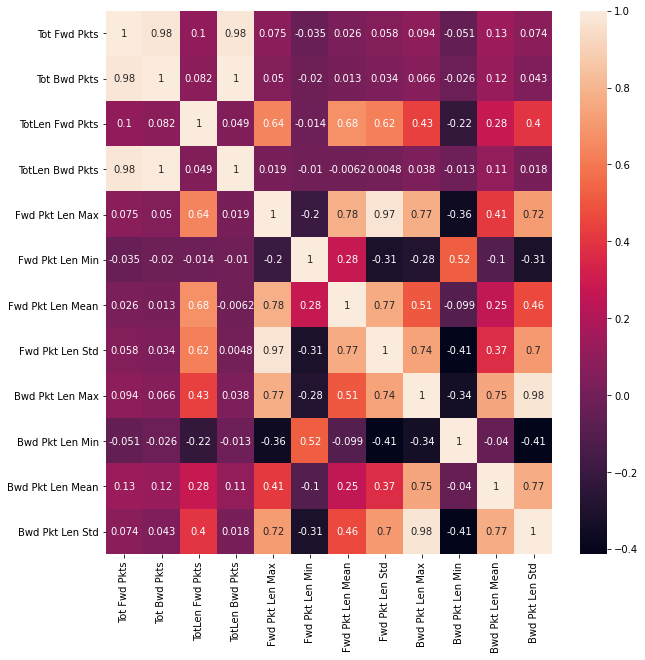

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
corr_matrix=dfpd[corr_feat].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

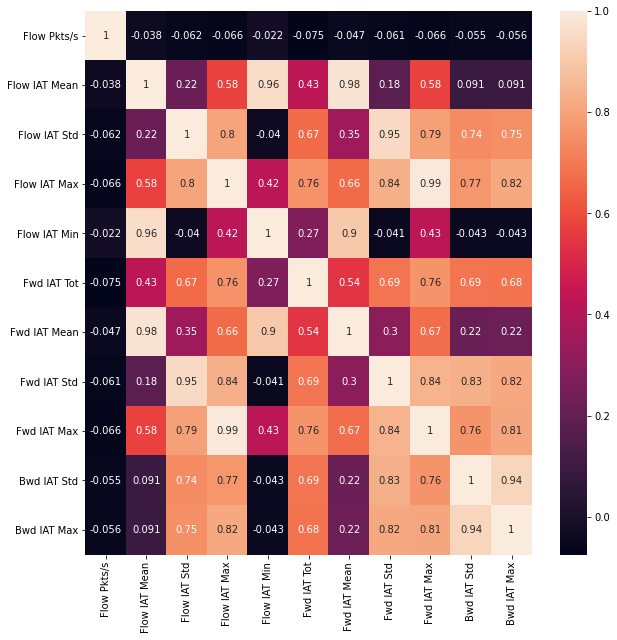

In [ ]:
corr_feat1=['Flow Pkts/s','Flow IAT Mean', 'Flow IAT Std','Flow IAT Max','Flow IAT Min', 'Fwd IAT Tot',
                'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
                'Bwd IAT Std', 'Bwd IAT Max',]
plt.figure(figsize=(10,10))
corr_matrix=dfpd[corr_feat1].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

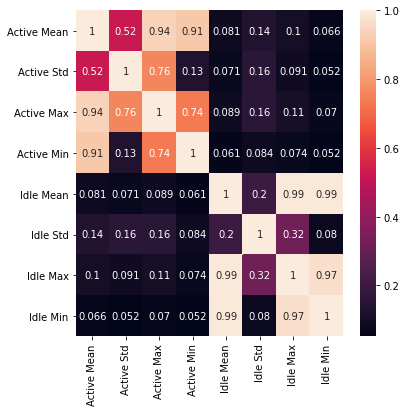

In [ ]:
corr_feat2=['Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min',]
plt.figure(figsize=(6,6))
corr_matrix=dfpd[corr_feat2].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

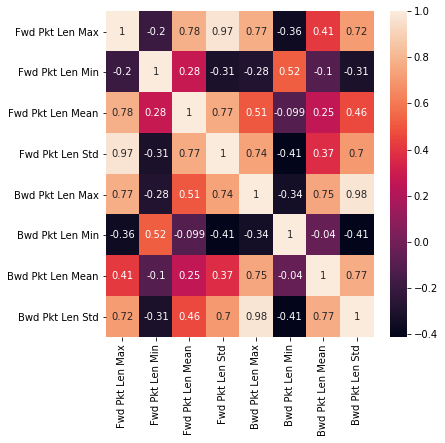

In [ ]:
corr_feat3=['Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',]
plt.figure(figsize=(6,6))
corr_matrix=dfpd[corr_feat3].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

### Visualizations 

In [46]:
import pandas as pd
frames = [dfpd, df2pd]
df_pd = pd.concat(frames)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


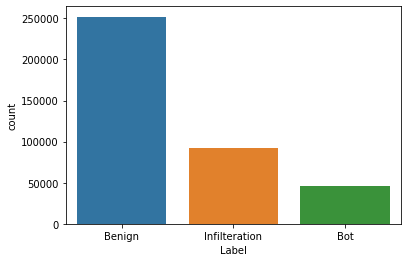

In [47]:
import seaborn as sns
sns.countplot(df_pd.Label)
plt.show()

In [30]:
dfpd.info

Dst Port           int32
Protocol           int32
Timestamp         object
Flow Duration      int32
Tot Fwd Pkts       int32
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max           int32
Idle Min           int32
Label             object
Length: 80, dtype: object

#### Visualizing the protocol column

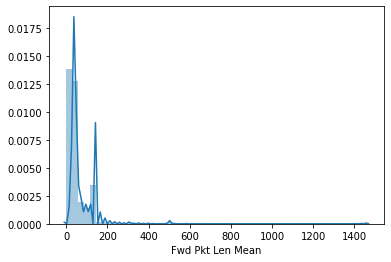

In [ ]:
sns.distplot(dfpd['Fwd Pkt Len Mean'])
plt.show()

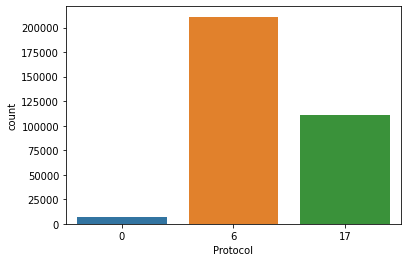

In [ ]:
sns.countplot(dfpd.Protocol)

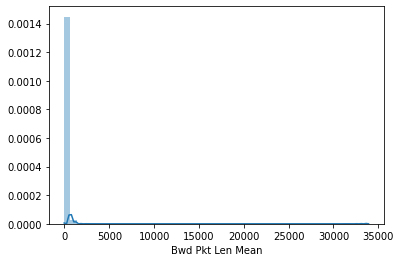

In [ ]:
sns.distplot(dfpd['Bwd Pkt Len Mean'])
plt.show()

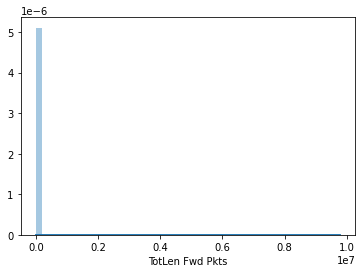

In [ ]:
sns.distplot(dfpd['TotLen Fwd Pkts'])
plt.show()

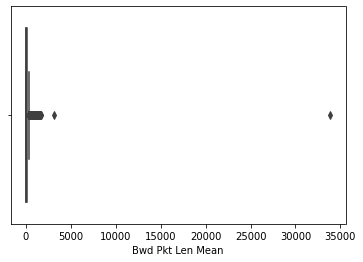

In [ ]:
sns.boxplot(dfpd['Bwd Pkt Len Mean'])
plt.show()

### Hypothesis Testing

H0: the sample has a Gaussian distribution. <br>
H1: the sample does not have a Gaussian distributio

In [62]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = df_pd['Tot Bwd Pkts']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.006, p=0.000
Probably not Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Aggregating the mean of the 'Bwd IAT Mean' and grouping it by the Label column

In [ ]:
df.groupby('Label').agg({'Bwd IAT Mean': 'mean'}).show()

+-------------+------------------+
|        Label| avg(Bwd IAT Mean)|
+-------------+------------------+
|Infilteration|  888940.839159052|
|       Benign|1019060.2277667207|
+-------------+------------------+



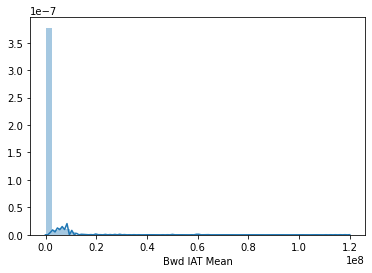

In [ ]:
sns.distplot(dfpd['Bwd IAT Mean'])
plt.show()

### 3.2 Design and Build a Machine Learning (ML) technique.


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
dfpd['Label'].replace('Infilteration', 0,inplace=True)
dfpd['Label'].replace('Benign', 1,inplace=True)
df=spark.createDataFrame(dfpd)

In [ ]:
features=['Dst Port',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min',]

In [ ]:
from pyspark.sql.functions import col, isnan, when, trim
def to_null(c):
    return when(~(col(c).isNull() | isnan(col(c)) | (trim(col(c)) == "")), col(c))
df.select([to_null(c).alias(c) for c in df.columns]).na.drop().show()

+--------+--------+----------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

feature_list = []
for col in df.columns:
    if col == 'Label' or col=='Timestamp':
        continue
    else:
        feature_list.append(col)
assembler = VectorAssembler(inputCols=feature_list, outputCol="features")
transformed_data = assembler.transform(df)

In [ ]:
df.select('Label').distinct().show()

+-----+
|Label|
+-----+
|    0|
|    1|
+-----+



In [ ]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2], seed =2020)

### 1. Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Label', maxIter=5)
lrModel = lr.fit(training_data)
lr_predictions = lrModel.transform(test_data)

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'Label', metricName = 'accuracy')
print('Logistic Regression Accuracy:', multi_evaluator.evaluate(lr_predictions))

### 2. Building a Random Forest Classifier to classfy the Label column

In [ ]:
rf = RandomForestClassifier(labelCol='Label',featuresCol='features',maxDepth=5)
model = rf.fit(training_data)

In [ ]:
rf_predictions = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'Label', metricName = 'accuracy')
print('Random Forest classifier Accuracy:', multi_evaluator.evaluate(rf_predictions))

Random Forest classifier Accuracy: 0.7747038559168379


### 3. Building a Decision Tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Label', maxDepth = 3)
dtModel = dt.fit(training_data)
dt_predictions = dtModel.transform(test_data)
multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'Label', metricName = 'accuracy')
print('Decision Tree Accuracy:', multi_evaluator.evaluate(dt_predictions))

Decision Tree Accuracy: 0.767390910189774


### 4.Gradient-Boosted Tree Classifier.

In [ ]:
from pyspark.ml.classification import GBTClassifier
gb = GBTClassifier(labelCol = 'Label', featuresCol = 'features')
gbModel = gb.fit(training_data)
gb_predictions = gbModel.transform(test_data)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'Label', metricName = 'accuracy')
print('Gradient-boosted Trees Accuracy:', multi_evaluator.evaluate(gb_predictions))

Gradient-boosted Trees Accuracy: 0.7816692856279464
